In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, utils, layers, models
from tensorflow.keras import optimizers

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

NUM_CLASSES = 10

In [3]:
# Ensure the pixel values are between 0 and 1
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

# one-hot encode the y values (the image labels)
y_train = utils.to_categorical(y_train, NUM_CLASSES) 
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [4]:
input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)



2024-02-29 04:05:50.164537: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

In [6]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 35s 21ms/step - loss: 1.5522 - accuracy: 0.4589
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1311 - accuracy: 0.6013
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9806 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8940 - accuracy: 0.6920
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8349 - accuracy: 0.7111
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7848 - accuracy: 0.7291
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7424 - accuracy: 0.7423
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7064 - accuracy: 0.7529
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6681 - accuracy: 0.7669
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7968 - accuracy: 0.7252


[0.7967884540557861, 0.7251999974250793]

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 6ms/step


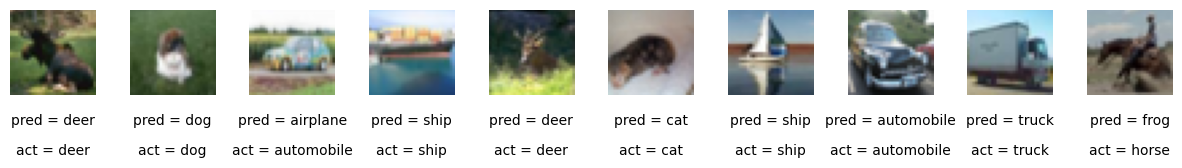

In [11]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)